In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("최종_자치구별_데이터.csv")
df

,Unnamed: 0,범죄 발생 합계,범죄 검거 합계,검거율(%),CCTV 총계,가로등 개수,소음진동 민원,소방서 개수,경찰서 개수,화재 발생 건수,...,녹지 총 면적,미세먼지,초미세먼지,학원개수,마트,식당,카페,체육시설,도서관 개수,전시관 시설 개수
0,종로구,2981.0,3485.0,116.907078,2339,7433,2200,7,24,201,...,17469,58,52,309,902.0,4815.0,1226.0,41,9,930
1,중구,3348.0,2465.0,73.626045,3118,8709,1223,6,18,137,...,32525,62,51,168,1875.0,4844.0,990.0,32,8,570
2,용산구,3021.0,2268.0,75.074479,3609,7560,3175,6,12,219,...,46079,0,46,262,723.0,3846.0,942.0,39,4,153
3,성동구,2023.0,1411.0,69.747899,4638,6283,2574,5,11,199,...,42235,64,43,580,2139.0,3384.0,909.0,113,7,52
4,광진구,3424.0,2333.0,68.136682,4636,5105,1374,4,13,193,...,47511,58,48,740,923.0,3672.0,819.0,115,8,53
5,동대문구,2957.0,2301.0,77.815353,3846,8517,3437,6,14,158,...,56607,61,53,694,1928.0,3908.0,632.0,62,10,33
6,중랑구,3324.0,2474.0,74.428400,5392,7668,3003,5,10,175,...,52930,52,43,565,1068.0,3205.0,512.0,137,6,11
7,성북구,2411.0,1958.0,81.211116,4906,5796,2775,5,16,246,...,52005,55,38,960,965.0,3363.0,736.0,161,13,77
8,강북구,2497.0,2142.0,85.782940,3584,4379,1192,5,13,200,...,37933,57,46,416,864.0,2822.0,460.0,148,7,22
9,도봉구,1921.0,1406.0,73.191046,2808,5032,1153,5,10,179,...,55159,64,50,611,771.0,2181.0,373.0,101,10,23


In [ ]:
# 데이터 인덱스 설정

df.index = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
            '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
            '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
df = df.drop(columns="Unnamed: 0", errors="ignore")

In [ ]:
## 자치구 간에 영향을 많이 미칠 요소 4가지를 기준으로 PCA를 각각 수행하고자 함
## 각 요소별 칼럼 부여
pca_groups = {
    "안전 및 치안": ['범죄 발생 합계', '범죄 검거 합계', '검거율(%)', 'CCTV 총계',
        '가로등 개수', '소음진동 민원', '소방서 개수', '경찰서 개수', '화재 발생 건수'],
    "교통": ['1만대당 교통사고 발생', '버스 이용', '지하철 이용', '택시 이용',
        '노선수', '따릉이정류소', '교량 연장(m)', '지하철_역_수', '버스_정거장_수'],
    "부동산 및 환경": ['평균 실거래가', '인구밀도', '신축 동수', '노후건물 수',  '녹지 총 면적', '미세먼지', '초미세먼지'],
    "생활 인프라 & 상업 시설": [ '마트', '식당', '카페', '집객시설_수', '관공서_수', '은행_수', '약국_수', '체육시설', '도서관 개수', '전시관 시설 개수']
}

# PCA

In [ ]:
# PCA + MinMaxScaler
pca_results = {}
explained_variance_ratios = {}

for category, cols in pca_groups.items():
    df_subset = df[cols].dropna()
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_subset)

    pca = PCA()
    pca.fit(df_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # 분산이 90% 이상 되는 최소 주성분 개수로.
    optimal_components = np.argmax(explained_variance >= 0.9) + 1
    pca = PCA(n_components=optimal_components)
    transformed_data = pca.fit_transform(df_scaled)

    pca_results[category] = transformed_data[:, 0]  # 첫 번째 주성분만 사용
    explained_variance_ratios[category] = explained_variance[:optimal_components]

df_pca_MM = pd.DataFrame(pca_results, index=df.index) # PCA를 적용한 데이터프레임

In [ ]:
# PCA + RobustScaler
pca_results = {}
explained_variance_ratios = {}

for category, cols in pca_groups.items():
    df_subset = df[cols].dropna()
    scaler = RobustScaler()
    df_scaled = scaler.fit_transform(df_subset)

    pca = PCA()
    pca.fit(df_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # 분산이 90% 이상 되는 최소 주성분 개수로.
    optimal_components = np.argmax(explained_variance >= 0.9) + 1
    pca = PCA(n_components=optimal_components)
    transformed_data = pca.fit_transform(df_scaled)

    pca_results[category] = transformed_data[:, 0]  # 첫 번째 주성분만 사용
    explained_variance_ratios[category] = explained_variance[:optimal_components]

df_pca_R = pd.DataFrame(pca_results, index=df.index) # PCA를 적용한 데이터프레임

In [ ]:
# PCA + StandardScaler
pca_results = {}
explained_variance_ratios = {}

for category, cols in pca_groups.items():
    df_subset = df[cols].dropna()
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)

    pca = PCA()
    pca.fit(df_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # 분산이 90% 이상 되는 최소 주성분 개수로.
    optimal_components = np.argmax(explained_variance >= 0.9) + 1
    pca = PCA(n_components=optimal_components)
    transformed_data = pca.fit_transform(df_scaled)

    pca_results[category] = transformed_data[:, 0]  # 첫 번째 주성분만 사용
    explained_variance_ratios[category] = explained_variance[:optimal_components]

df_pca_S = pd.DataFrame(pca_results, index=df.index) # PCA를 적용한 데이터프레임

# Clustering

In [ ]:
!pip install hdbscan

In [ ]:
pip install scikit-learn-extra

In [ ]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import hdbscan

## Spectral Clustering / K-means / Agglomerative Clustering / K-Medoids

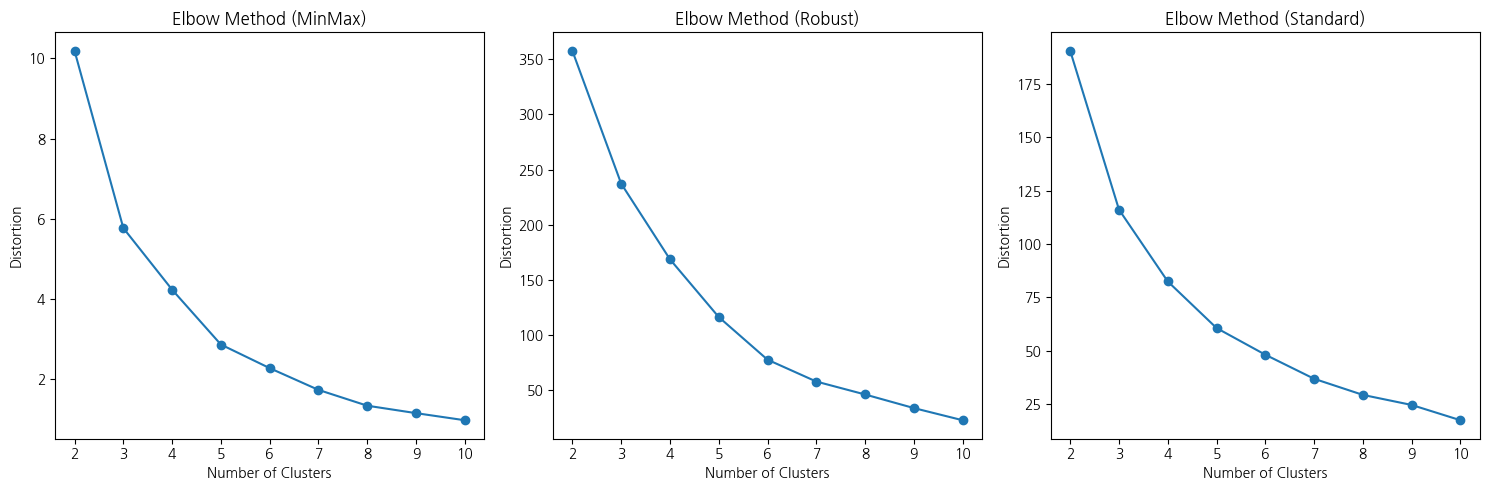

In [ ]:
# 최적의 클러스터 개수 찾기 (Elbow Method)
elbow_results = {}
pca_results = {}
df_pca_dict = {
    "MinMax": df_pca_MM,
    "Robust": df_pca_R,
    "Standard": df_pca_S
}

for scaler_name, df_pca in df_pca_dict.items():
    distortions = []
    K = range(2, 11)  # 클러스터 개수 2~10 탐색
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_pca)
        distortions.append(kmeans.inertia_)  # 관성 값 저장 (Elbow 그래프용)

    elbow_results[scaler_name] = distortions

# 클러스터 개수 시각화 (엘보우 그래프)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (scaler_name, distortions) in enumerate(elbow_results.items()):
    axes[i].plot(K, distortions, marker="o")
    axes[i].set_title(f"Elbow Method ({scaler_name})")
    axes[i].set_xlabel("Number of Clusters")
    axes[i].set_ylabel("Distortion")

plt.tight_layout()
plt.show()

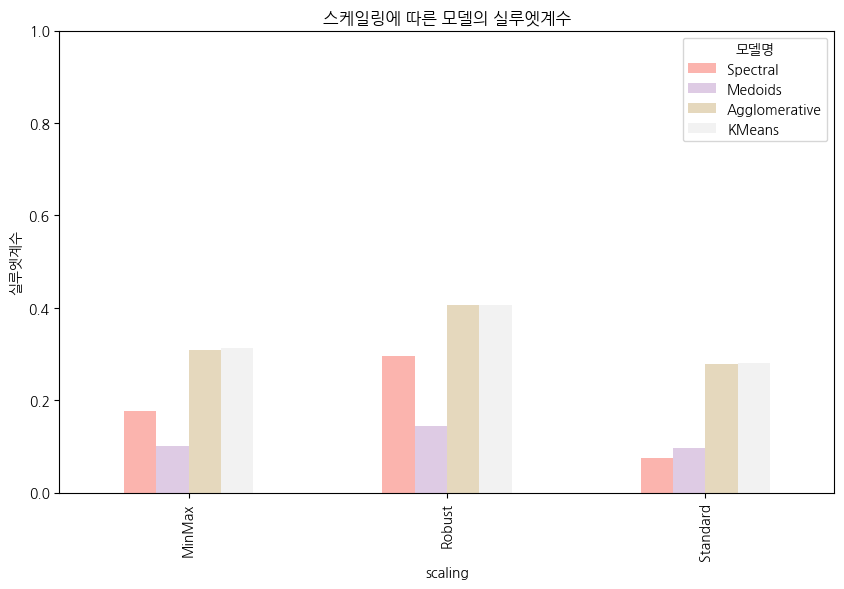

In [ ]:
# 최적 클러스터 개수 = 5 => 스케일러와 상관없이 5가 모두 가장 좋다고 판단
n_clusters = 5

# 클러스터링 적용 및 실루엣계수 계산
scores_dict = {}

for scaler_name, df_pca in df_pca_dict.items():
    df_t = df_pca.copy() # 클러스터링 결과

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    df_t["Cluster_Spectral"] = spectral.fit_predict(df_pca)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    df_t["Cluster_Agglo"] = agglo.fit_predict(df_pca)

    # K-Medoids
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    df_t["Cluster_KMedoids"] = kmedoids.fit_predict(df_pca)

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df_t["Cluster_KMeans"] = kmeans.fit_predict(df_pca)

    # 실루엣계수 저장
    scores = {
        "Spectral": silhouette_score(df_pca, df_t["Cluster_Spectral"]),
        "Medoids": silhouette_score(df_pca, df_t["Cluster_KMedoids"]),
        "Agglomerative": silhouette_score(df_pca, df_t["Cluster_Agglo"]),
        "KMeans": silhouette_score(df_pca, df_t["Cluster_KMeans"])
    }

    scores_dict[scaler_name] = scores

# Silhouette Score 시각화
scores_df = pd.DataFrame(scores_dict).T
scores_df.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
plt.title("스케일링에 따른 모델의 실루엣계수")
plt.xlabel("scaling")
plt.ylabel("실루엣계수")
plt.ylim(0, 1)
plt.legend(title="모델명")
plt.show()

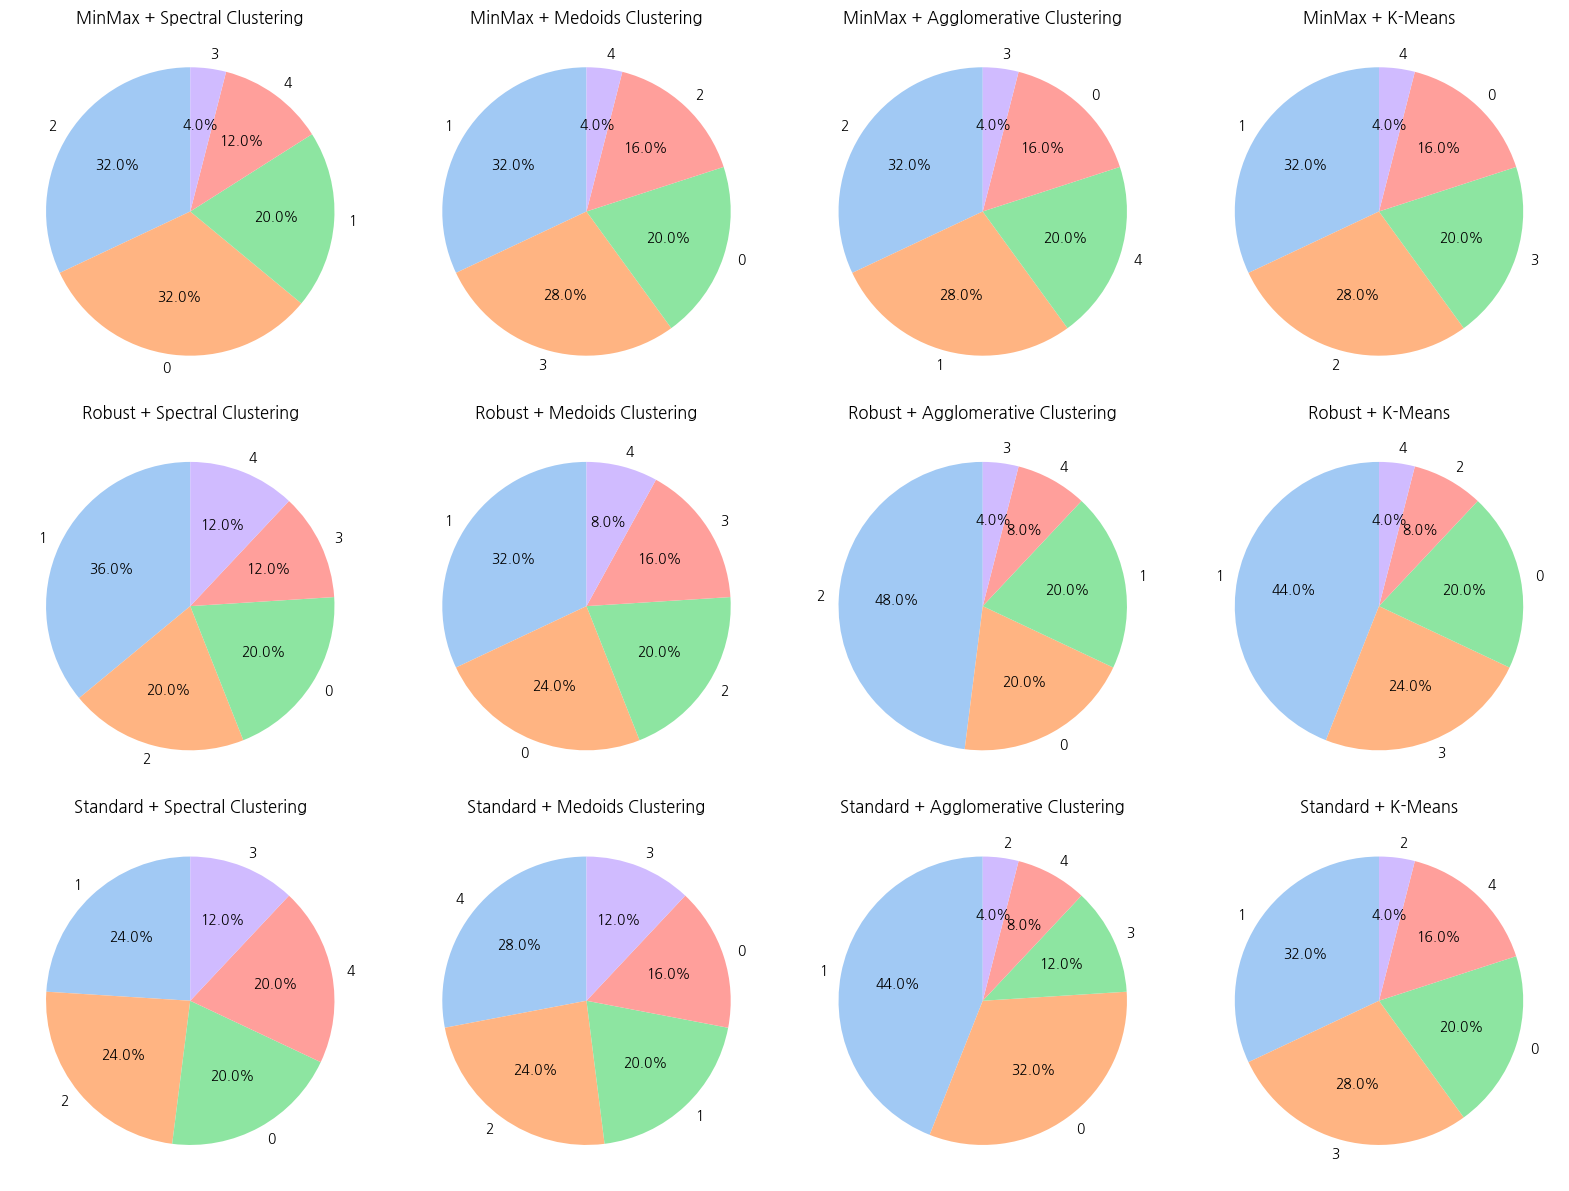

In [ ]:
## 자치구 클러스터링 결과 분포가 균등하게되어야한다고 생각하여 분포확인 시각화 진행
# 클러스터 개수 비율 시각화 (Scaler별 3세트)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

scaler_names = ["MinMax", "Robust", "Standard"]
methods = ["Cluster_Spectral", "Cluster_KMedoids", "Cluster_Agglo", "Cluster_KMeans"]
model_names = ["Spectral Clustering", "Medoids Clustering", "Agglomerative Clustering", "K-Means"]

for row, scaler_name in enumerate(scaler_names):
    df_t = df_pca_dict[scaler_name].copy()

    # 클러스터링 적용
    spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
    df_t["Cluster_Spectral"] = spectral.fit_predict(df_t)

    agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
    df_t["Cluster_Agglo"] = agglo.fit_predict(df_t)

    kmedoids = KMedoids(n_clusters=5, random_state=42)
    df_t["Cluster_KMedoids"] = kmedoids.fit_predict(df_t)

    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    df_t["Cluster_KMeans"] = kmeans.fit_predict(df_t)

    for col, (method, model) in enumerate(zip(methods, model_names)):
        cluster_counts = df_t[method].value_counts(normalize=True)
        colors = sns.color_palette("pastel")
        ax = axes[row, col]
        cluster_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(f"{scaler_name} + {model}")
        ax.set_ylabel("")

plt.tight_layout()
plt.show()


## HDBSCAN

In [ ]:
# 다른 클러스터링 기법의 성능이 좋지 않아, HDBSCAN 모델을 사용하고자함
# 이상치로 분류된경우 KNN을 사용하여 제일 최대한 가까운 클러스터로 분류되도록 진행할 예정
# 이상치 재분류후, 실루엣 계수가 가장 높은 스케일링 방법을 사용하여 진행할 예정

## Scaler별 HDBSCAN
hdbscan_results = {}

for scaler_name, df_pca in df_pca_dict.items():
    df_t = df_pca.copy() # 결과 저장 데이터프레임

    ## HDBSCAN 클러스터링
    hdb = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
    df_t["Cluster_HDBSCAN"] = hdb.fit_predict(df_t)

    ## 실루엣계수 계산 (노이즈 X)
    core_samples_mask = df_t["Cluster_HDBSCAN"] != -1
    silhouette_hdbscan = silhouette_score(
        df_t[core_samples_mask], df_t.loc[core_samples_mask, "Cluster_HDBSCAN"]
    ) if core_samples_mask.any() else None

    # 이상치 재분류 => KNN 사용
    outliers = df_t[df_t["Cluster_HDBSCAN"] == -1]
    df_normal = df_t[df_t["Cluster_HDBSCAN"] != -1]

    if not outliers.empty:
        # KNN
        nn = NearestNeighbors(n_neighbors=1)
        nn.fit(df_normal.drop(columns="Cluster_HDBSCAN"))
        nearest_neighbors = nn.kneighbors(outliers.drop(columns="Cluster_HDBSCAN"), return_distance=False)

        # 가장 가까운 클러스터로 재분류 진행
        assigned_clusters = [
            df_normal.iloc[neighbors]["Cluster_HDBSCAN"].values[0] for neighbors in nearest_neighbors
        ]
        df_t.loc[df_t["Cluster_HDBSCAN"] == -1, "Cluster_HDBSCAN"] = assigned_clusters

    # 실루엣계수 다시 계산
    updated = df_t["Cluster_HDBSCAN"] != -1
    silhouette_hdbscan_updated = silhouette_score(
        df_t[updated], df_t.loc[updated, "Cluster_HDBSCAN"]
    ) if updated.any() else None

    # 결과 저장
    hdbscan_results[scaler_name] = {
        "df": df_t,
        "silhouette_original": silhouette_hdbscan,
        "silhouette_updated": silhouette_hdbscan_updated,
    }

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

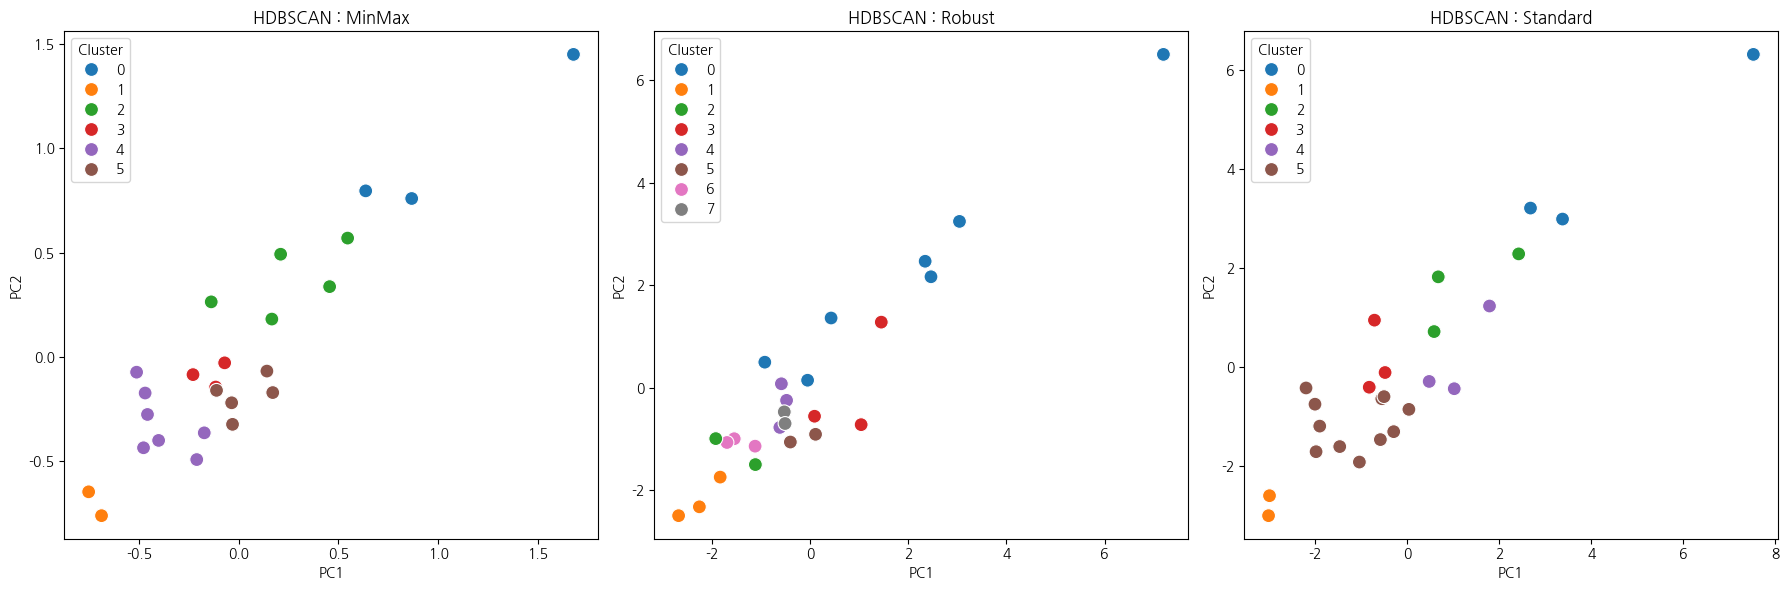

In [ ]:
# 클러스터링 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (scaler_name, result) in enumerate(hdbscan_results.items()):
    df_t = result["df"]
    ax = axes[i]

    sns.scatterplot(
        x=df_t.iloc[:, 0], y=df_t.iloc[:, 1],
        hue=df_t["Cluster_HDBSCAN"], palette="tab10", s=100, ax=ax
    )
    ax.set_title(f"HDBSCAN : {scaler_name}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


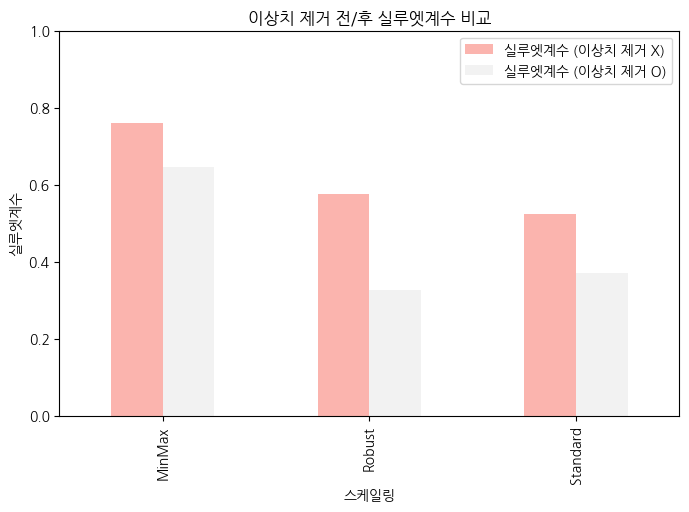

In [ ]:
## 실루엣계수 비교
silhouette_scores_df = pd.DataFrame({
    scaler_name: {
        "실루엣계수 (이상치 제거 X)": result["silhouette_original"],
        "실루엣계수 (이상치 제거 O)": result["silhouette_updated"],
    }
    for scaler_name, result in hdbscan_results.items()
}).T

silhouette_scores_df.plot(kind="bar", figsize=(8, 5), colormap="Pastel1")
plt.title("이상치 제거 전/후 실루엣계수 비교")
plt.xlabel("스케일링")
plt.ylabel("실루엣계수")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
silhouette_scores_df

,실루엣계수 (이상치 제거 X),실루엣계수 (이상치 제거 O)
MinMax,0.759583,0.644897
Robust,0.574888,0.325415
Standard,0.523157,0.369397


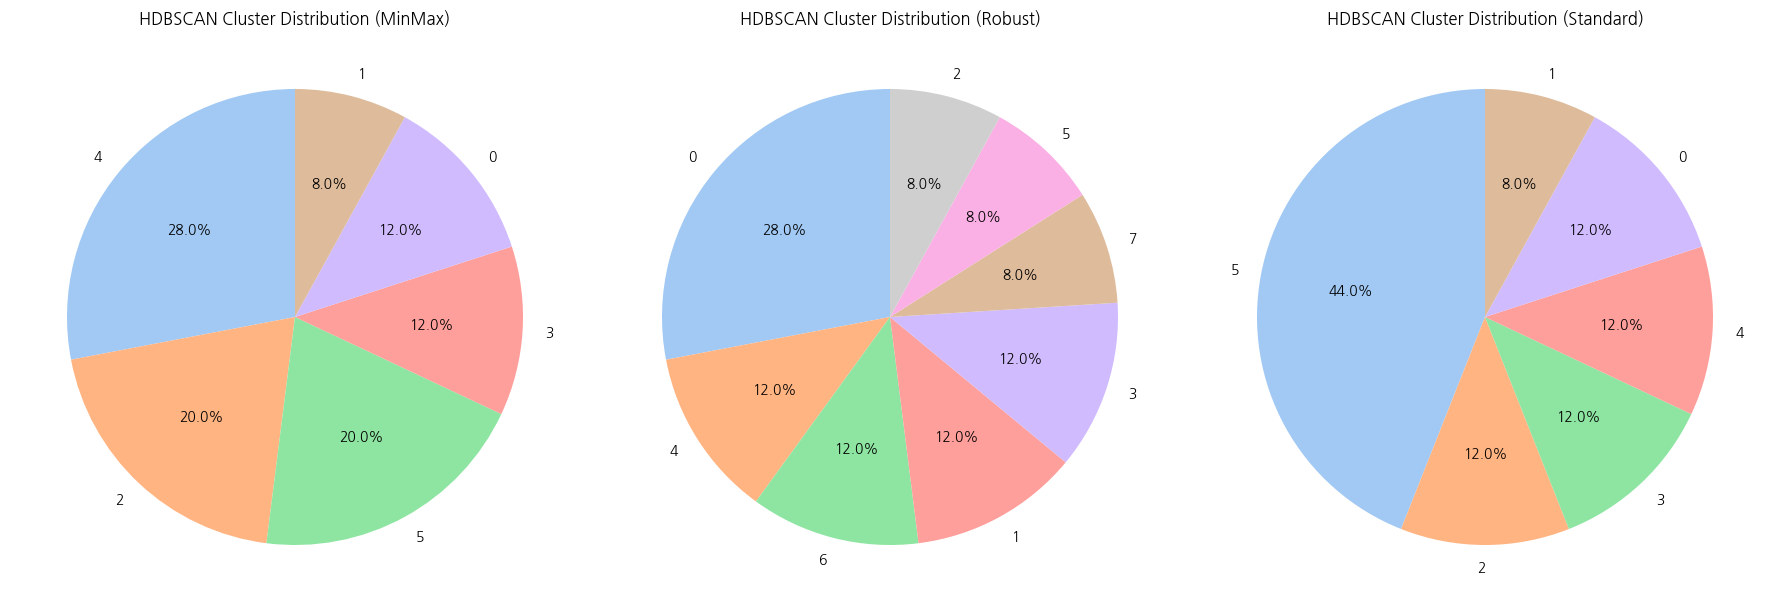

In [ ]:
# 클러스터링 분포 비율 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (scaler_name, result) in enumerate(hdbscan_results.items()):
    df_t = result["df"]
    ax = axes[i]
    # 클러스터 분포 비율
    cluster_counts = df_t["Cluster_HDBSCAN"].value_counts(normalize=True)
    colors = sns.color_palette("pastel")

    cluster_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f"HDBSCAN Cluster Distribution ({scaler_name})")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

# 최종 PCA + 클러스터링

In [ ]:
df = pd.read_csv("최종_자치구별_데이터.csv")

# 데이터 인덱스 설정

df.index = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
            '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
            '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']
df = df.drop(columns="Unnamed: 0", errors="ignore")

In [ ]:
# PCA + MinMaxScaler
pca_results = {}
explained_variance_ratios = {}

for category, cols in pca_groups.items():
    df_subset = df[cols].dropna()
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_subset)

    pca = PCA()
    pca.fit(df_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # 분산이 90% 이상 되는 최소 주성분 개수로.
    optimal_components = np.argmax(explained_variance >= 0.9) + 1
    pca = PCA(n_components=optimal_components)
    transformed_data = pca.fit_transform(df_scaled)

    pca_results[category] = transformed_data[:, 0]  # 첫 번째 주성분만 사용
    explained_variance_ratios[category] = explained_variance[:optimal_components]

df_pca = pd.DataFrame(pca_results, index=df.index) # PCA를 적용한 데이터프레임

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score (HDBSCAN): 0.7595833510501734


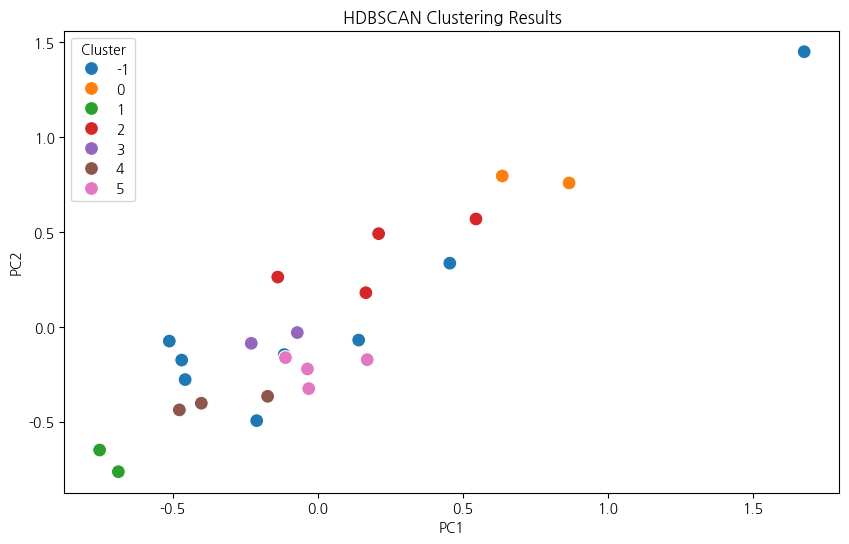

Updated Silhouette Score (HDBSCAN after outlier reassignment): 0.6448969242389562


In [ ]:
# HDBSCAN 클러스터링 적용
hdb = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
df_pca["Cluster_HDBSCAN"] = hdb.fit_predict(df_pca)

# Silhouette Score 계산 (노이즈 제외)
core_samples_mask = df_pca["Cluster_HDBSCAN"] != -1
silhouette_hdbscan = silhouette_score(
    df_pca[core_samples_mask], df_pca.loc[core_samples_mask, "Cluster_HDBSCAN"]
) if core_samples_mask.any() else None

print(f"Silhouette Score (HDBSCAN): {silhouette_hdbscan}")

# HDBSCAN 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1],
    hue=df_pca["Cluster_HDBSCAN"], palette="tab10", s=100
)
plt.title("HDBSCAN Clustering Results")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# 이상치(-1 클러스터) 처리: 최근접 클러스터에 포함시키기
outliers = df_pca[df_pca["Cluster_HDBSCAN"] == -1]
df_normal = df_pca[df_pca["Cluster_HDBSCAN"] != -1]

if not outliers.empty:
    # 최근접 클러스터 찾기 (K를 3~5로 조정)
    k_neighbors = 1  # K 값을 증가시켜 더 안정적인 배정
    nn = NearestNeighbors(n_neighbors=k_neighbors)
    nn.fit(df_normal.drop(columns="Cluster_HDBSCAN"))

    # 가장 가까운 K개의 이웃 찾기
    nearest_neighbors = nn.kneighbors(outliers.drop(columns="Cluster_HDBSCAN"), return_distance=False)

    # 가장 많은 이웃이 속한 클러스터를 이상치에 할당
    assigned_clusters = []
    for neighbors in nearest_neighbors:
        neighbor_clusters = df_normal.iloc[neighbors]["Cluster_HDBSCAN"].values
        assigned_cluster = np.bincount(neighbor_clusters).argmax()  # 가장 많이 등장한 클러스터 선택
        assigned_clusters.append(assigned_cluster)

    df_pca.loc[df_pca["Cluster_HDBSCAN"] == -1, "Cluster_HDBSCAN"] = assigned_clusters


# 수정된 클러스터링 결과에서 Silhouette Score 재계산
core_samples_mask_updated = df_pca["Cluster_HDBSCAN"] != -1
silhouette_hdbscan_updated = silhouette_score(
    df_pca[core_samples_mask_updated], df_pca.loc[core_samples_mask_updated, "Cluster_HDBSCAN"]
) if core_samples_mask_updated.any() else None

print(f"Updated Silhouette Score (HDBSCAN after outlier reassignment): {silhouette_hdbscan_updated}")

# 이상치였던 데이터들이 어디로 이동했는지 확인
df_outlier_movement = df_pca[df_pca.index.isin(outliers.index)][["Cluster_HDBSCAN"]]


In [ ]:
df_pca['Cluster_HDBSCAN'].value_counts()

,count
Cluster_HDBSCAN,
4,7
2,5
5,5
3,3
0,3
1,2


In [ ]:
df_pca

,안전 및 치안,교통,부동산 및 환경,생활 인프라 & 상업 시설,Cluster_HDBSCAN
종로구,0.166078,0.180551,0.205565,0.364813,2
중구,-0.137797,0.263067,0.039213,0.214179,2
용산구,-0.115641,-0.145648,0.612802,-0.181802,3
성동구,-0.457295,-0.277365,0.178051,-0.257877,4
광진구,-0.401484,-0.401903,-0.113825,-0.367347,4
동대문구,-0.111289,-0.161639,-0.306012,-0.207662,5
중랑구,-0.172744,-0.365521,-0.141569,-0.437756,4
성북구,-0.229145,-0.086086,-0.052067,0.006330,3
강북구,-0.477195,-0.437174,-0.025062,-0.445255,4
도봉구,-0.687642,-0.763019,-0.282289,-0.580232,1


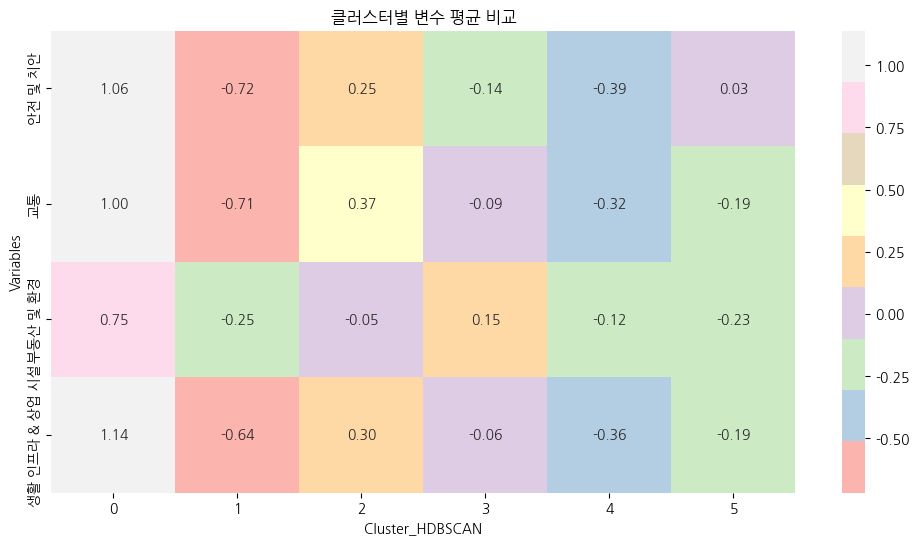

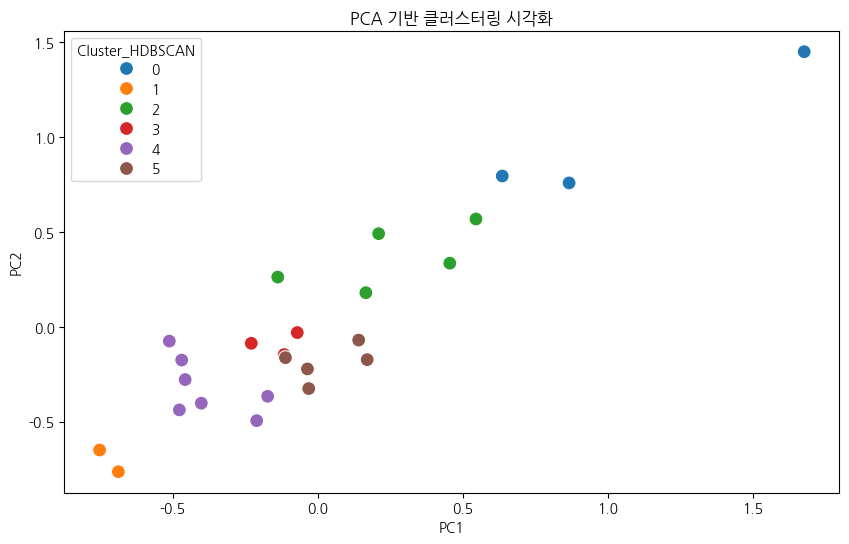

<ipython-input-532-5ece32fecd8d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="tab10")


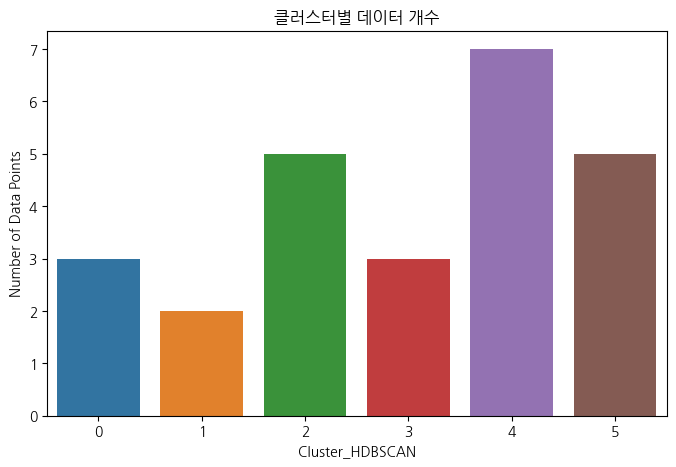

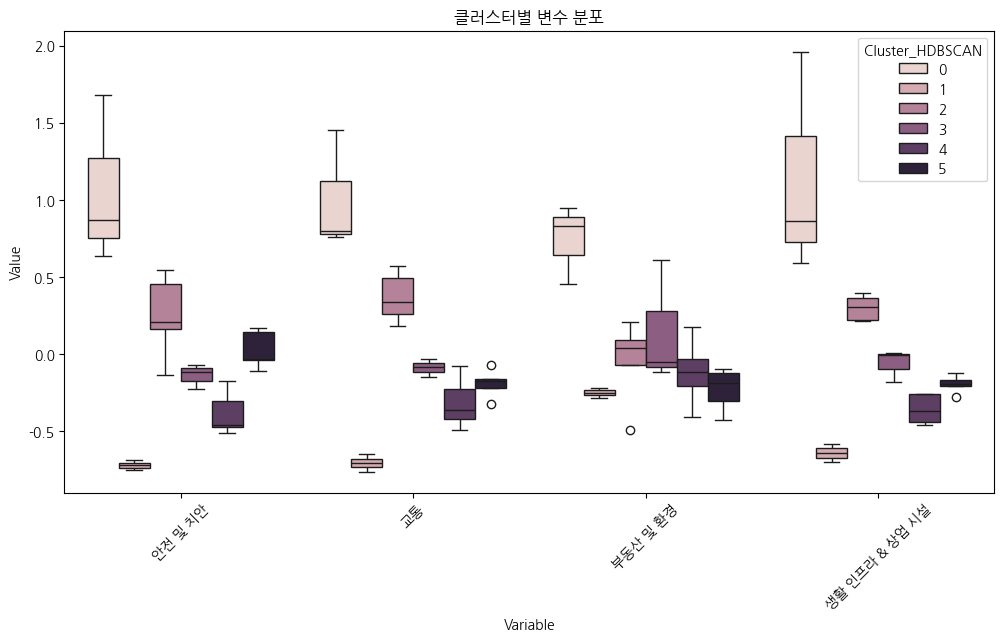

In [ ]:
## 클러스터간 결과 비교를 위해

# 클러스터별 변수 평균
cluster_means = df_pca.groupby("Cluster_HDBSCAN").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="Pastel1", fmt=".2f")
plt.title("클러스터별 변수 평균 비교")
plt.xlabel("cluster")
plt.ylabel("변수")
plt.show()

# 데이터 분포
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_pca["Cluster_HDBSCAN"], palette="tab10", s=100)
plt.title("PCA 기반 클러스터링 시각화")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster_HDBSCAN")
plt.show()

# 클러스터별 데이터 분포
cluster_counts = df_pca["Cluster_HDBSCAN"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="tab10")
plt.title("클러스터별 데이터 개수")
plt.xlabel("Cluster_HDBSCAN")
plt.ylabel("Number of Data Points")
plt.show()

# 클러스터별 변수 차이
df_pca_melted = df_pca.melt(id_vars=["Cluster_HDBSCAN"], var_name="Variable", value_name="Value")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Variable", y="Value", hue="Cluster_HDBSCAN", data=df_pca_melted)
plt.xticks(rotation=45)
plt.title("클러스터별 변수 분포")
plt.show()


In [ ]:
# 피어슨 상관계수를 사용한 클러스터와 변수간 비교
import scipy.stats as stats

correlation_matrix = df_pca.corr()
cluster_corr = correlation_matrix["Cluster_HDBSCAN"].drop("Cluster_HDBSCAN")

cluster_corr

,Cluster_HDBSCAN
안전 및 치안,-0.481013
교통,-0.597385
부동산 및 환경,-0.580724
생활 인프라 & 상업 시설,-0.610380


# 사용자 필터링

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, chebyshev

In [ ]:
# 중요도 점수 매핑
importance_mapping = {"낮음": 0.1, "보통": 3, "높음": 15}

def recommend_cluster(user_importance):
    # 가중치 벡터 생성
    weights_df = pd.DataFrame([importance_mapping[user_importance[key]] for key in pca_groups.keys()],
                              index=pca_groups.keys()).T

    # 클러스터별 평균 벡터 가져오기
    cluster_means = df_pca.groupby("Cluster_HDBSCAN").mean()

    # MinMaxScaler
    scaler = MinMaxScaler()
    cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means),
                                        columns=cluster_means.columns,
                                        index=cluster_means.index)

    # 사용자 벡터에 MinMaxScaler 적용
    user_vector_scaled = pd.DataFrame(scaler.transform(weights_df),
                                      columns=weights_df.columns)

    # 코사인 유사도
    similarities = cosine_similarity(user_vector_scaled, cluster_means_scaled)[0]

    # 유클리드 거리
    euclidean_distances = np.array([euclidean(user_vector_scaled.iloc[0], cluster) for _, cluster in cluster_means_scaled.iterrows()])

    # 민코프스키 거리
    minkowski_distances = np.array([minkowski(user_vector_scaled.iloc[0], cluster, p=0.5) for _, cluster in cluster_means_scaled.iterrows()])

    # 유사도 점수 조합 (코사인 유사도 80% + 유클리드 거리 10% + 민코프스키 거리 10%)
    scores = similarities * 0.8 + (1 - euclidean_distances / euclidean_distances.max()) * 0.1+ (1 - minkowski_distances / minkowski_distances.max()) * 0.1

    # 클러스터 1이 모든 값의 평균? 을 대표하는 클러스터라, 0.005를 넘는다면 엄청 많은 값을 가지는 것이여서 이렇게 설정하였다.
    if scores[1] > 0.007 :
      best_cluster = cluster_means.index[1]
    else :
      best_cluster = cluster_means.index[np.argmax(scores)]

    # 해당 클러스터의 자치구
    recommended_districts = df_pca[df_pca["Cluster_HDBSCAN"] == best_cluster].index.tolist()

    return best_cluster, recommended_districts

In [ ]:
# 실험 : 유저가 생각하는 모두 낮은 중요도를 가지는 경우
user_input = {
    "안전 및 치안": "낮음",
    "교통": "낮음",
    "부동산 및 환경": "낮음",
    "생활 인프라 & 상업 시설": "낮음"
}

best_cluster, recommended_districts = recommend_cluster(user_input)

print(f"추천 클러스터: {best_cluster}")
print(f"추천 지역: {recommended_districts}")

추천 클러스터: 1
추천 지역: ['도봉구', '금천구']


In [ ]:
# 가능한 모든 중요도 값을 전부 실험 해보고자

importance_levels = ["낮음", "보통", "높음"]

# 모든 조합 생성
all_combinations = []
for a in importance_levels:
    for b in importance_levels:
        for c in importance_levels:
            for d in importance_levels:
                all_combinations.append((a, b, c, d))

# 결과 저장
results = []

# 모든 조합에 대해 클러스터 추천
for combination in all_combinations:
    user_input = {
        "안전 및 치안": combination[0],
        "교통": combination[1],
        "부동산 및 환경": combination[2],
        "생활 인프라 & 상업 시설": combination[3]
    }
    best_cluster, _ = recommend_cluster(user_input)
    results.append({
        "안전 및 치안": combination[0],
        "교통": combination[1],
        "부동산 및 환경": combination[2],
        "생활 인프라 & 상업 시설": combination[3],
        "추천 클러스터": best_cluster
    })


df_results = pd.DataFrame(results)
df_results['추천 클러스터'].value_counts()

,count
추천 클러스터,
3,30
2,18
5,13
0,11
4,6
1,3
